### TITLE : Implementation of Principal Component Analysis in Compression of Image Data using Python programming
    
### Course : Software Laboratory (CSC 320)
    
### Submitted to : MR. Ugwu
    
### By : Peter Christopher Abiodun

### Matric Number: CSC/2017/1183
    
### Under the Guidance of : MR. Ugwu
    
### Date : June, 2021

# TABLE OF CONTENTS



#### - Introduction
#### - Statement of the problem
#### - Algorithm
#### - Implementation
#### - User Guide
#### - Reference

 ##                                                  INTRODUCTION
          Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional datasets into a dataset with fewer variables, where the set of resulting variables explains the maximum variance within the dataset, PCA is used prior to unsupervised and supervised machine learning steps to reduce the number of features used in analysis, thereby reducing the likelihood of error. It is basically a non-dependent procedures in which it reduces attribute space from a large number of variables to smaller number of factors, though PCA is no guarantee that the dimension is interpretable but the main task of PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with principal amount.
        
          In all, Principal Components first principal components has maximum variance. With the little introduction above, we could list out  major uses of PCA, some of them are:
- It is used to find inter-relation between variables in the data
- It is used to interpret and visualize data
- As number of variables are decreasing, it makes further analysis simpler
- It's often used to visualize genetic distance and relatedness between populations




## STATEMENT OF THE PROBLEM

As regarding the implementation of Principal Component Analysis (PCA ) in image Data, we'd be focusing on using PCA for image Compression in python. Principal Component Analysis is a technique that minimizes the size in bytes of an image while keeping as much of the quality of the image as possible.
Images have a lot of pixels to retain their clarity, but that significantly increases its size and slows down the performance of the system when it has to load, preprocess or train multiple images. To overcome this issue, we can use the dimensionality reduction technique (PCA) which comes under Unsupervised Machine Learning.

## PCA ALGORITHM AND IMPLEMENTATION

In [2]:
#import necessary libraries for the implementation
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

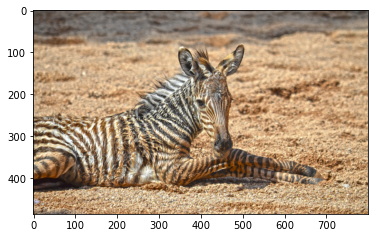

In [12]:
#load the image data and convert it from BGR to RGB
img = cv2.cvtColor(cv2.imread(r"C:\Users\King alagbe\Downloads\zebra.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [14]:
# check the image size
img.shape

(486, 800, 3)

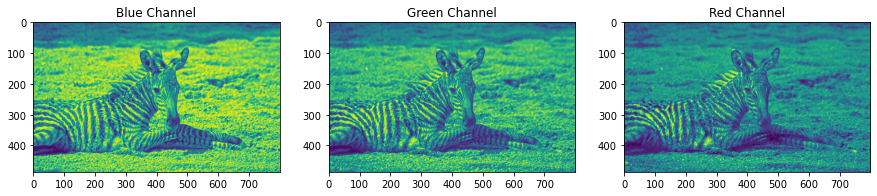

In [16]:
# Split the image to Blue , Green and red arrays
blue, green, red = cv2.split(img)
# Lets visulaize the splittings beind made by plotting it
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [19]:
# Let's verify if it already truely extracted the 3 channels (Blue, Red, Green)
blue_verify = pd.DataFrame( data = blue)
blue_verify

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,85,86,91,93,99,100,98,102,102,97,...,79,78,77,77,76,76,85,89,91,91
1,88,86,89,90,92,96,95,95,94,91,...,77,71,68,72,77,75,86,90,94,97
2,89,90,86,88,88,89,88,88,89,88,...,71,69,64,69,74,81,86,94,94,97
3,86,86,86,84,83,87,85,86,88,88,...,71,70,69,71,80,85,85,93,95,96
4,84,86,83,82,85,83,87,90,87,87,...,72,73,75,78,81,86,88,91,94,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,140,138,97,90,91,123,152,153,141,135,...,199,177,188,209,196,209,190,149,143,137
482,145,116,111,115,148,157,175,158,154,162,...,231,225,163,171,210,202,177,136,136,131
483,126,137,125,118,146,164,151,123,123,144,...,230,185,122,164,167,189,146,174,219,210
484,105,123,116,111,133,156,125,104,110,123,...,187,144,87,162,193,188,151,217,211,173


In [20]:
green_verify = pd.DataFrame( data = green)
green_verify

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,80,83,86,88,94,95,93,97,97,92,...,71,73,72,72,73,73,82,86,87,88
1,83,81,81,85,87,89,90,90,89,87,...,69,66,65,67,72,74,83,89,90,93
2,84,81,79,83,83,80,83,83,84,83,...,66,66,61,64,69,78,83,91,89,92
3,81,79,79,79,78,79,80,81,83,83,...,64,60,62,62,71,76,83,89,90,91
4,75,77,76,75,76,78,82,87,82,82,...,65,66,67,69,74,79,84,87,89,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,122,121,70,63,69,104,130,126,113,114,...,183,144,141,160,145,154,139,106,102,88
482,127,90,80,88,131,141,157,136,126,136,...,194,202,127,112,148,146,130,90,91,87
483,98,115,94,87,123,143,126,95,91,118,...,197,154,79,109,119,128,100,119,163,163
484,77,100,85,80,106,135,100,78,80,91,...,144,109,48,103,140,138,107,155,158,129


In [21]:
red_verify = pd.DataFrame( data = red)
red_verify

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,74,78,82,82,88,91,89,94,93,88,...,68,69,68,68,68,68,77,81,86,83
1,77,75,78,81,83,83,86,86,85,84,...,66,62,56,63,68,69,74,84,87,90
2,78,74,73,79,79,75,77,79,80,79,...,62,61,56,58,65,71,74,84,85,89
3,77,73,73,73,72,76,76,77,79,79,...,58,58,56,53,62,69,68,80,86,88
4,70,72,70,69,71,74,76,80,78,78,...,57,58,64,62,68,71,75,76,85,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,100,103,51,46,55,89,107,107,92,97,...,150,111,95,104,92,98,94,71,72,47
482,103,73,60,69,115,125,133,115,102,111,...,123,160,91,56,91,95,88,56,58,42
483,77,94,73,66,105,114,104,74,68,91,...,143,125,45,45,73,71,64,54,102,109
484,56,82,65,60,87,108,80,63,54,66,...,99,79,19,35,88,85,60,98,108,90


PCA is very sensitive to data, with all these large numbers being displayed on each channel verified, it would not make it perform so well. To solve this issue, we'd Scale the data.

In [22]:
blue_channel = blue/255
green_channel = green/255
red_channel = red/255

#### Fit data and Transform the data


Each channel has 486 dimmensions (according to the number of rows detected in the extracted numbers from each chaneels), we'd consider 40 dimensions for Principal Component Analysis (PCA) and let's watch how it's going to perform.
Nevertheless, we could also try implementing any other new dimension to fit our taste of the dimensionality reduction.

In [54]:
# Let's initiaize PCA with first 20 principal components
pca = PCA(40)
 
# apply the initialize pca to the red channel
transform_red = pca.fit_transform(red_channel)
# apply the inverse transform to transformed array "transform_red"
red_inverted = pca.inverse_transform(transform_red)
 
# apply the initialize pca to the green channel
transform_green = pca.fit_transform(green_channel)
# apply the inverse transform to transformed array "transform_green"
green_inverted = pca.inverse_transform(transform_green)
 
# apply the initialize pca to the green channel
transform_blue = pca.fit_transform(blue_channel)
# apply the inverse transform to transformed array "transform_blue"
blue_inverted = pca.inverse_transform(transform_blue)


In [55]:
print(red_inverted.shape, green_inverted.shape, blue_inverted.shape)

(486, 800) (486, 800) (486, 800)


we were given the same size for the three inverted channels
now let's merge these 3 channels together to give just one size


In [56]:
img_reduced= (cv2.merge((red_inverted, green_inverted, blue_inverted)))
print(img_reduced.shape)

(486, 800, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


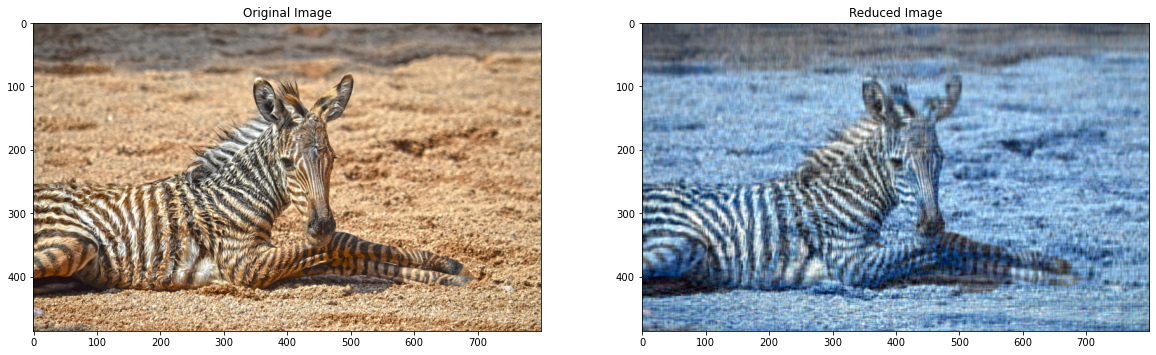

In [57]:
fig = plt.figure(figsize = (20, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

Finally, we were about to reduce the Dimension of the image data from 486 to 30 (the image above depicts that, spot the difference). With this, computational problems would be reduced and our computers would be fast in loading or training any image data as Principal Component Analysis (PCA) has reduced it's dimension and still kept important features

# References

1. https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118

2. https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118

3. https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118

4. https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

5. https://towardsdatascience.com/image-compression-using-principal-component-analysis-pca-253f26740a9f